# Grab some data from acorn

In [2]:
import hfradar.imos as acorn
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import afloat.plot.plotting as zplot


def plot_acorn_radial_points(ds):
    # Extract lon/lat as 1D numpy arrays
    lon = ds.LONGITUDE.values
    lat = ds.LATITUDE.values

    # Build a DataFrame
    df = pd.DataFrame({
        "longitude": lon,
        "latitude": lat,
    })

    # Create Point geometries
    geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]

    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame(
        df,
        geometry=geometry,
        crs="EPSG:4326"   # WGS84
    )

    site = ds.attrs['platform_code']
    # Write to shapefile
    try:
        gdf.to_file(f"{site} radar.shp")
    except Exception as e:
        print(f"Error writing shapefile: {e}")

    instrument = ds.attrs['instrument']
    instrument = instrument.split(" ")[0]

    bigsite = ds.attrs['site_code']

    plt.plot(gdf.geometry.x, gdf.geometry.y, '.')
    # Render title as 3 line title
    plt.title(f"{site} ({bigsite})\n{instrument}\nRadial points")
    plt.xlabel("Longitude")

    # Add a basemap without contextily
    plt.ylabel("Latitude")
    plt.grid()
    
    plt.gca().set_aspect('equal', adjustable='box')

    # Now just make the axes square around this midpoint
    minx, maxx = plt.gca().get_xlim()
    miny, maxy = plt.gca().get_ylim()
    midx = (minx + maxx) / 2
    midy = (miny + maxy) / 2
    half_width = max((maxx - minx), (maxy - miny)) / 2
    plt.gca().set_xlim(midx - half_width, midx + half_width)
    plt.gca().set_ylim(midy - half_width, midy + half_width)

    zplot.global_coast_fill(plt.gca(), 'intermediate')
    


In [3]:
my_data = {}

Accessing https://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/radial/PTB/2025/07//catalog.html
Accessing https://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/radial/PTB/2025/07//31/catalog.html
Selected resolution: i
Accessing https://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/radial/FRE/2025/07//catalog.html
Accessing https://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/radial/FRE/2025/07//31/catalog.html
Selected resolution: i
Accessing https://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/radial/GUI/2025/07//catalog.html
Accessing https://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/radial/GUI/2025/07//31/catalog.html
Selected resolution: i
Accessing https://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/radial/LANC/2025/07//catalog.html
Accessing https://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/radial/LANC/2025/07//31/catalog.html
Selected resolution: i
Accessing https://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/radial/GHED/2025/07//catalog.html
Accessing h

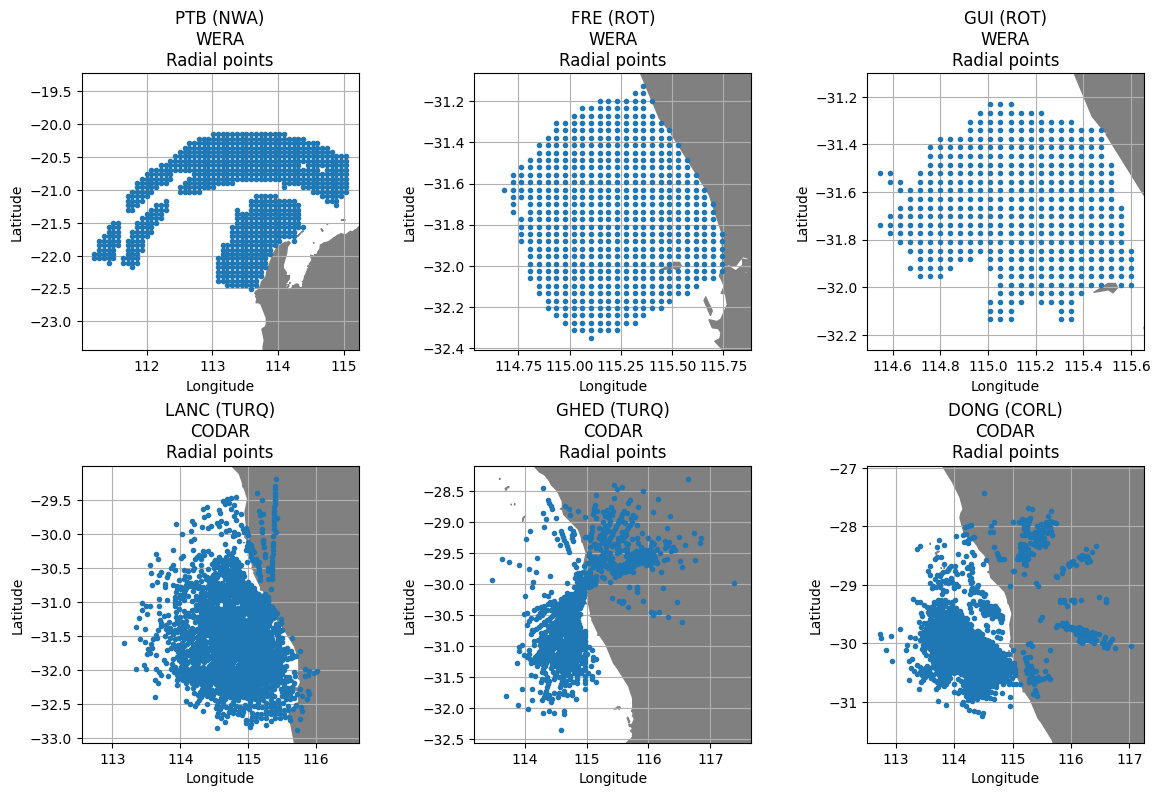

In [4]:
import importlib
importlib.reload(acorn)

# OK now do 9 sites in a loop, putting them on a 3x3 grid
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs = axs.flatten()

for i, site in enumerate(['PTB', 'FRE', 'GUI', 'LANC', 'GHED', 'DONG']):

    axs_current = axs[i]
    plt.sca(axs_current)
    try :
        ds_site = my_data[site]
    except KeyError:
        ds_site, url_site = acorn.get_acorn_radial_file(site, year='2025', month=7)
        my_data[site] = ds_site

    plot_acorn_radial_points(ds_site)

plt.tight_layout()
